# BUSINESS UNDERSTANDING

## PROBLEM STATEMENT
Customer churn poses a major threat to revenue and customer lifetime value for internet service providers. While retaining current customers is far more cost-efficient than attracting new ones, pinpointing those at risk of leaving continues to be a persistent challenge.

>This project seeks to build a predictive machine learning model that calculates churn risk scores and flags high-risk customers by integrating behavioral, demographic, and feedback data.

## OBJECTIVES
To develop a supervised machine learning model that predicts customer churn risk for internet service providers, leveraging behavioral, transactional, and feedback data.

>*Goal*: Enable companies to identify customers at high risk of churning, facilitating timely and targeted retention strategies.

This analysis seeks to address the following key business questions:

- Which *customer segments* exhibit the highest churn rates?
- What are the primary *behavioral or demographic* predictors of churn?
- Can *sentiment in customer feedback* enhance churn risk prediction?
- How effective are existing *loyalty strategies* at retaining customers?
- What *actionable retention strategies* can be developed from profiles of high-churn-risk customers?

# DATA UNDERSTANDING

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from scipy.stats import uniform, randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset 
df = pd.read_csv("churn.csv")

In [3]:
#Displaying the first 5 columns
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [4]:
#Getting the shape of dataframe
df.shape

(36992, 23)

In [5]:
# Displaying all columns that exist in our dataframe
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
#Trying to understand the data types in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [7]:
#Understanding the distribution of values in the dataframe
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [8]:
#Standardizing the column names by converting them to lowercase and replacing spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Checking for missing values
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

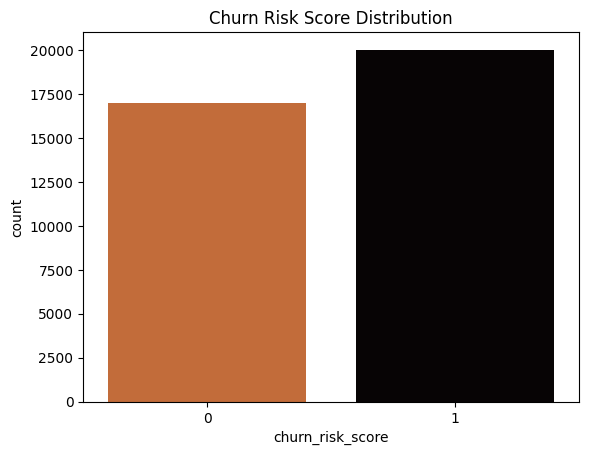

In [10]:
# Target distribution
custom_palette = {'0': "#d96623", '1': "#070405"}
sns.countplot(x='churn_risk_score', data=df, palette=custom_palette)
plt.title("Churn Risk Score Distribution")
plt.show()

The chart reveals that category 1 churn risk scores slightly outnumber those in category 0. This implies that more customers are at risk of leaving the company than staying.

We will employ a heatmap to visualize correlations among our numerical variables. This approach will help identify which features—such as `tenure_days` or `feedback_sentiment`—show the strongest associations with `churn_risk_score` when selecting model inputs.

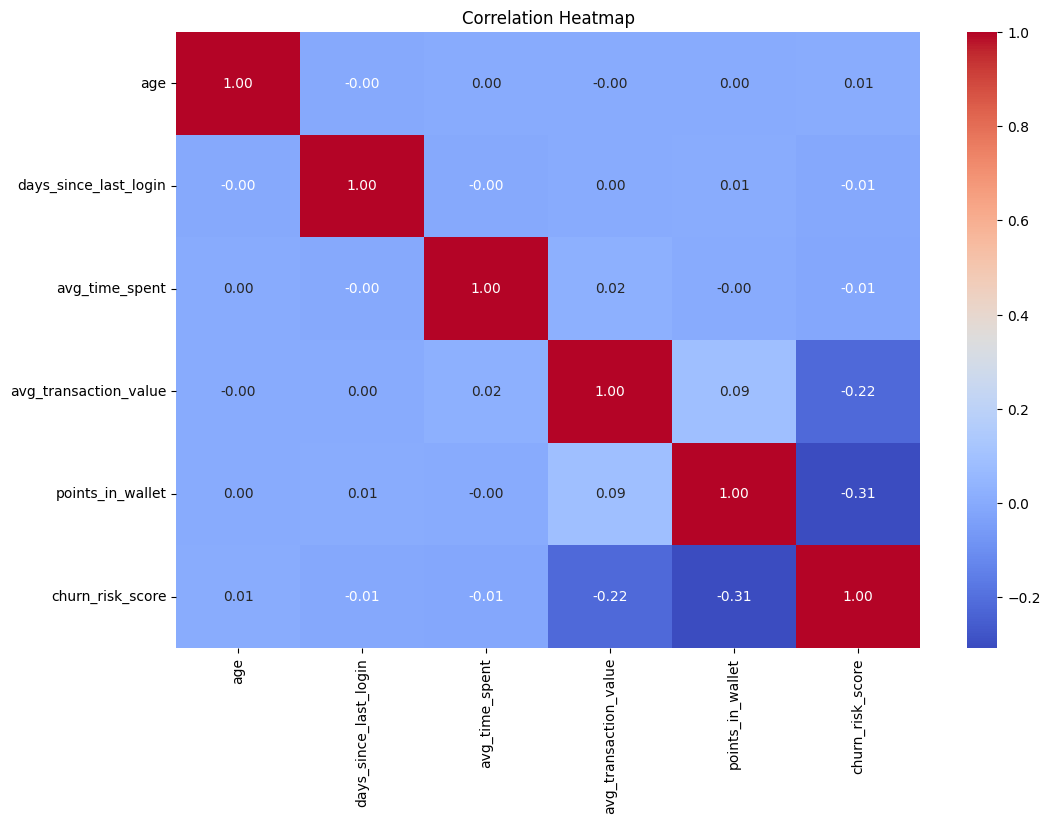

In [11]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

It appears that the numerical variables do not exhibit a strong correlation.


A histogram will be used to display the distribution of customer wallet points. This visualization will help us determine whether most customers hold low, average, or high points. It also provides insights into potential outliers or patterns that could influence churn.


In [12]:
# Our date column has dates recorded in different formats. To convert to datetime, we will use a date_parser
date_parser = lambda x: pd.to_datetime(x, format='mixed', dayfirst=True)
df['joining_date'] = df['joining_date'].apply(date_parser)

To support the analysis of seasonal and monthly churn patterns, we will separate this column into two fields: month and year.


In [13]:
# Feature engineering a column for month and year
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month

We will examine the number of signups throughout the data collection period.


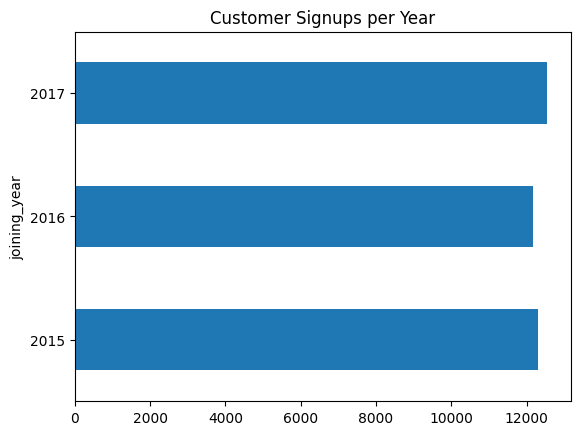

In [14]:
# Customer Signups Over Time
# bar plot of number of users joining per year.
df.groupby('joining_year').size().plot(kind='barh', title='Customer Signups per Year');

The bar graph shows that customer signups averaged slightly above 12,000, with 2017 recording the highest number among the three years.


We will check monthly signup trend.

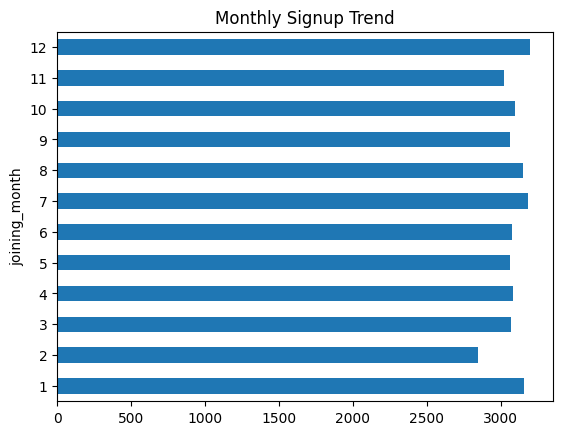

In [15]:
# Monthly Signup Trend (across all years)
# Group by joining_month to see seasonality.
df.groupby('joining_month').size().plot(kind='barh', title='Monthly Signup Trend');

The bar graph indicates that the peak signup months were January, July, and December. This trend is likely influenced by holiday seasons during these months. The product appears to sell more, possibly due to incentives such as discounts offered during the festive period. To validate this, we will plot a bar graph using the special discount column.


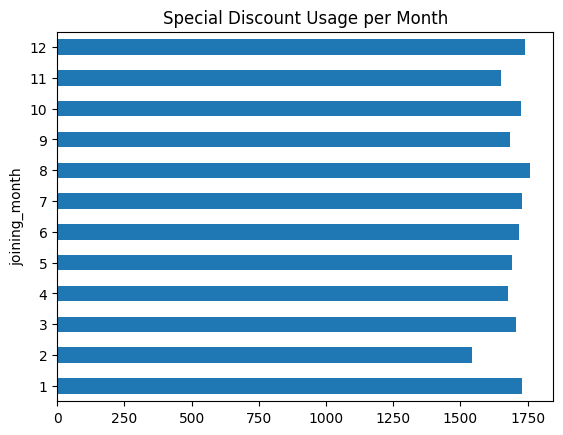

In [16]:
# Monthly Trend of Special Discount Usage

special_discount = df[df['used_special_discount'] == 'Yes']
special_discount.groupby('joining_month').size().plot(kind='barh', title='Special Discount Usage per Month');

The bar graph above supports our assumption, showing that special discount usage aligns with our earlier observations.


We are going to do analysis of the average transaction value over the three year period

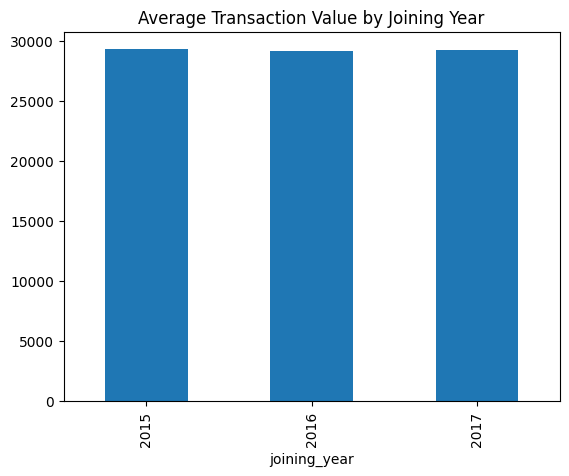

In [17]:
# User Behavior Over Time
df.groupby('joining_year')['avg_transaction_value'].mean().plot(kind='bar',title='Average Transaction Value by Joining Year');

The average transaction value remains relatively stable, ranging between 25,000 and 30,000 over the data collection period. Next, we will examine how this value is distributed across different regions and age groups, and how it relates to churn.


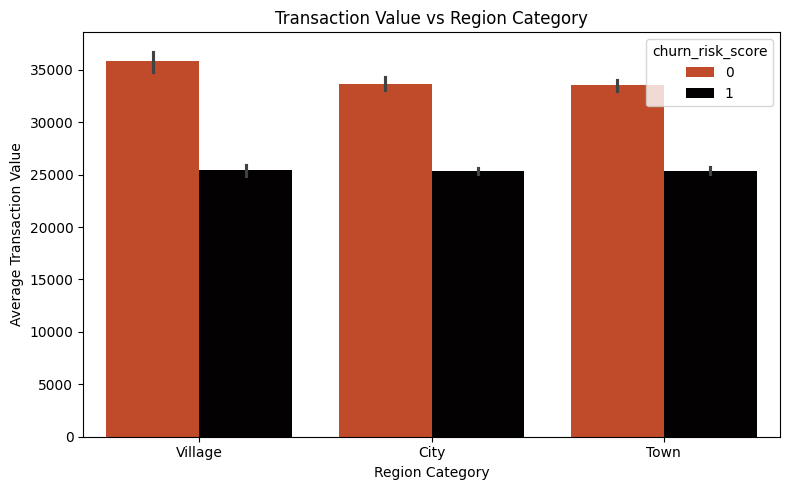

In [18]:
plt.figure(figsize=(8, 5))
custom_palette = {0: "#d93d12", 1: "#030101"}
sns.barplot(data=df, x='region_category', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette)
plt.title('Transaction Value vs Region Category')
plt.xlabel('Region Category')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

The village demographic appears to have the highest average transaction value, followed by the city and then the town categories. 

Next, we will analyze how this value is distributed across different age groups.


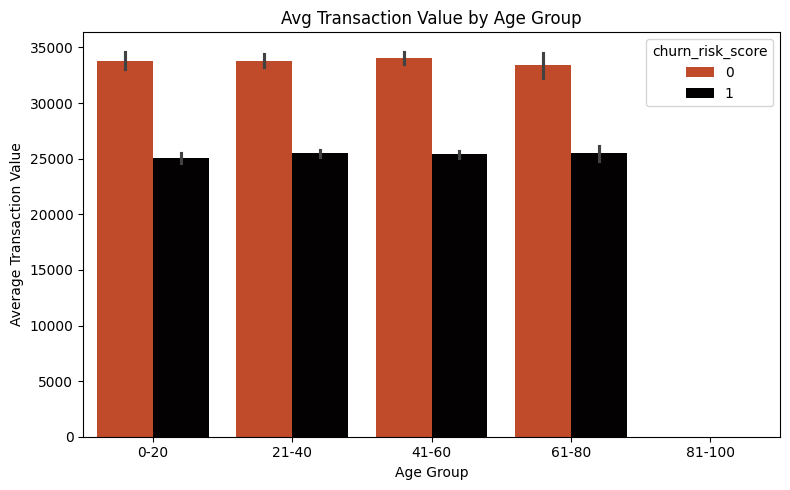

In [19]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age_group', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette)
plt.title('Avg Transaction Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

Average transanction value is evenly distributed across the age groups.

We will check the churn and complaints trends over time.

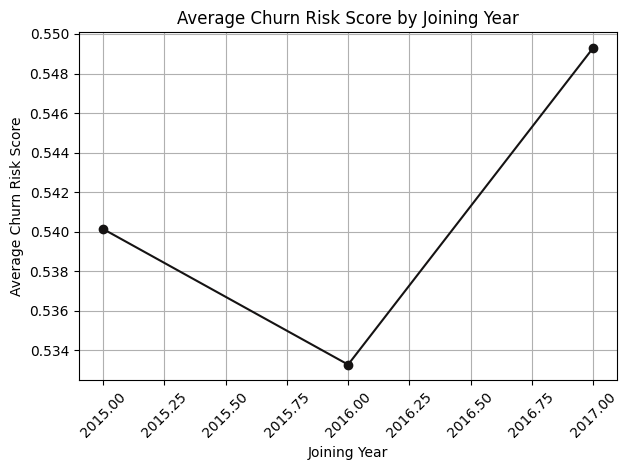

In [20]:
# Churn Risk Score by Year

df.groupby('joining_year')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color="#151313",
    title='Average Churn Risk Score by Joining Year'
)

plt.xlabel('Joining Year')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The churn risk score declined in 2016 but rose again in 2017. However, no clear upward or downward trend is observed, indicating that the year of customer acquisition does not significantly affect churn likelihood. Further analysis could investigate whether specific months, seasons, or other time-related factors have a stronger influence on churn risk.


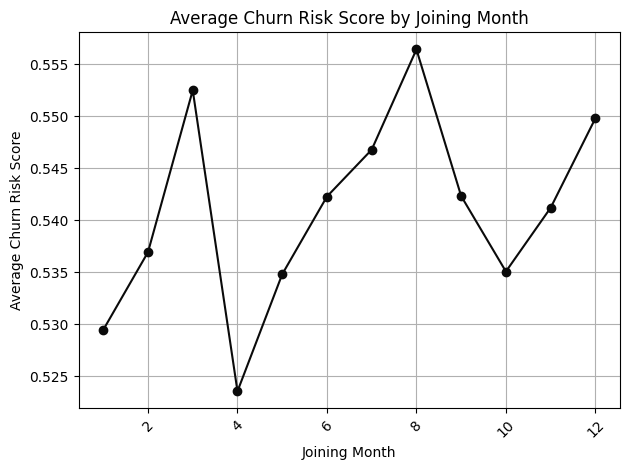

In [21]:
# Churn Risk Score by Month
df.groupby('joining_month')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color="#0a0a0a",
    title='Average Churn Risk Score by Joining Month'
)

plt.xlabel('Joining Month')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The lack of a clear upward or downward trend indicates that the month of joining does not consistently influence a customer’s likelihood of churning. However, the observed fluctuations suggest possible seasonal or month-specific effects that merit further exploration. Notably, March and August show the highest churn risk.


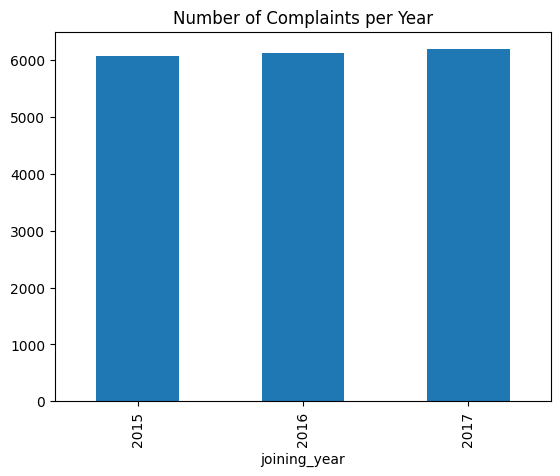

In [22]:
#Checking the trend of complaints over the period of years the data was collected
complaints_by_year = df[df['past_complaint'] == 'Yes'].groupby('joining_year').size()
complaints_by_year.plot(kind='bar', title='Number of Complaints per Year');

The bar graph above shows that the number of complaints averaged slightly above 6,000 over the three-year period.


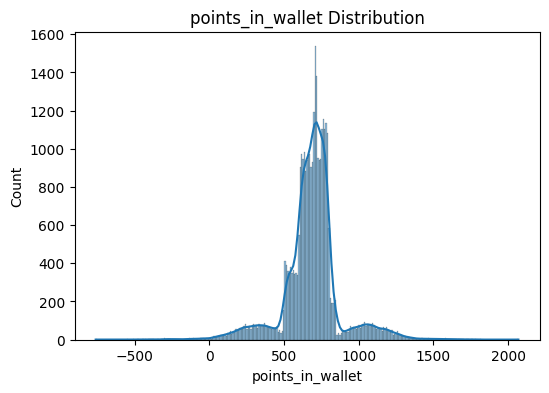

In [23]:
# Numerical distributions
for col in ['points_in_wallet']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True,palette='Set1')
    plt.title(f"{col} Distribution")
    plt.show()

The graph above shows a uniform distribution. 

Next, we will examine the relationship between wallet points and churn risk to assess how financial incentives influence customer spending.


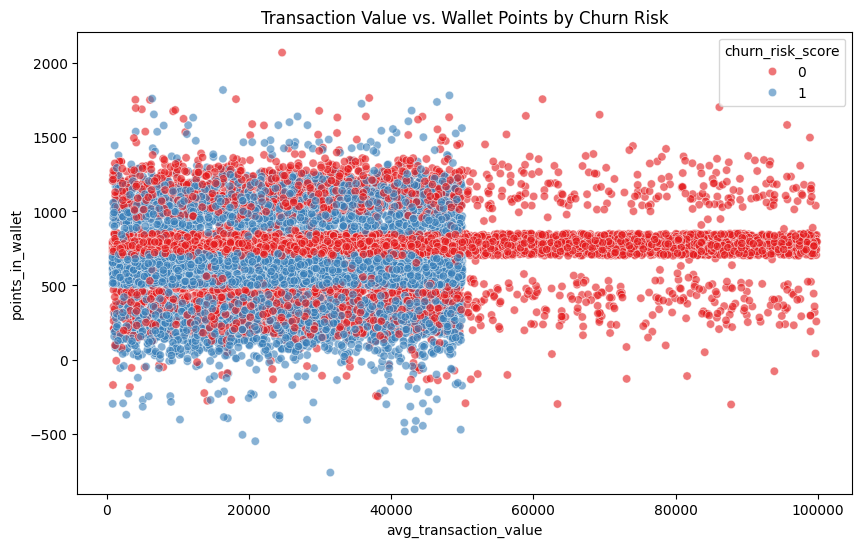

In [24]:
## Avg Transaction Value vs. Points in Wallet (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='avg_transaction_value', y='points_in_wallet',
    hue='churn_risk_score', palette='Set1', alpha=0.6
)
plt.title('Transaction Value vs. Wallet Points by Churn Risk')
plt.show()

Although transaction values range widely from near 0 to over 90,000, most customers cluster around mid-range wallet points (approximately 500 to 1,000). Notably, customers with low churn risk appear more concentrated at specific wallet point thresholds—such as 500 and 1,000—suggesting the presence of reward or loyalty milestones that support retention. In contrast, churn-risk customers are more widely dispersed, showing weaker alignment with these thresholds. This pattern suggests that encouraging higher or more structured wallet point accumulation could help reduce churn risk.


The below graph shows membership category against churn risk score.

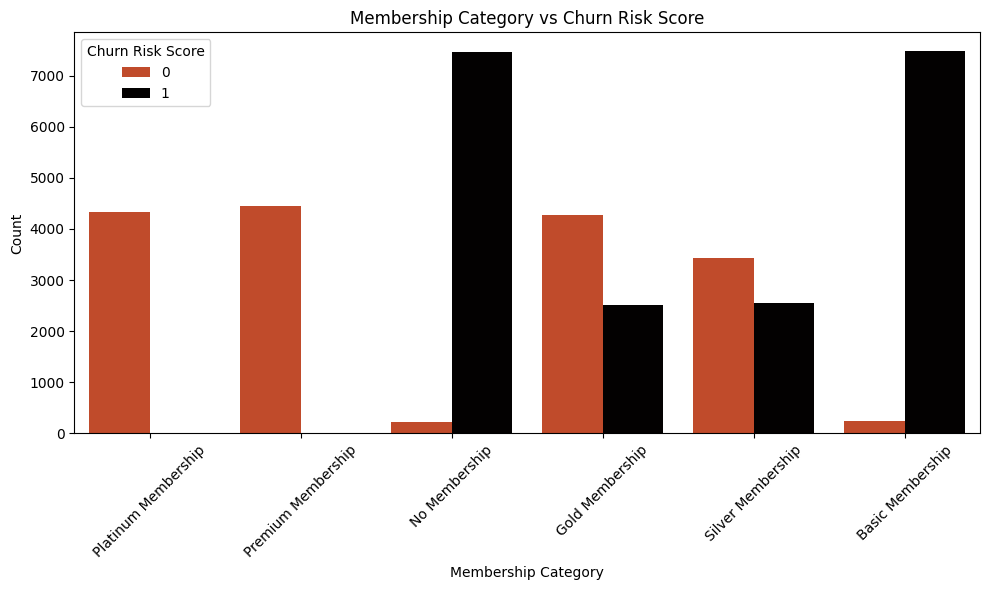

In [25]:
# Plot count of membership category vs churn risk score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score',palette=custom_palette)

# Visuals
plt.title("Membership Category vs Churn Risk Score")
plt.xlabel("Membership Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn Risk Score")
plt.tight_layout()
plt.show()

The graph shows that customers with basic memberships have a higher likelihood of churning, while churn risk decreases as membership level increases.


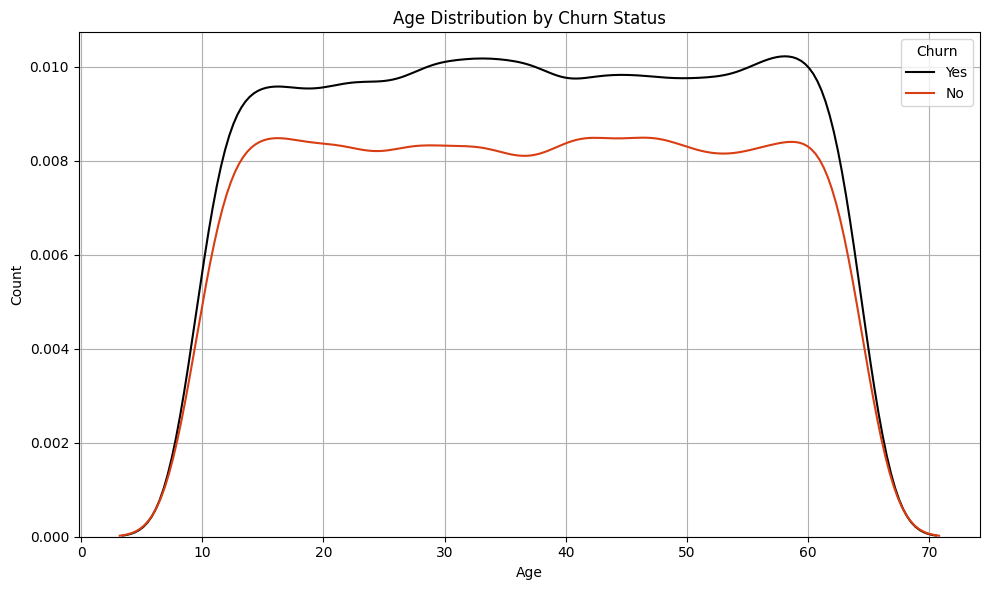

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='churn_risk_score',fill=False, palette=custom_palette)

plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.grid(True)
plt.tight_layout()
plt.show()

The age distribution chart indicates that churn is relatively consistent across all age groups, with no specific age range showing notably higher or lower churn rates. This suggests that age is not a strong predictor of churn in this dataset, and other factors such as tenure, usage, or region may provide more valuable insights into customer churn behavior.


We will try and see the relationship between churn risk and tenure days using a KDE plot.

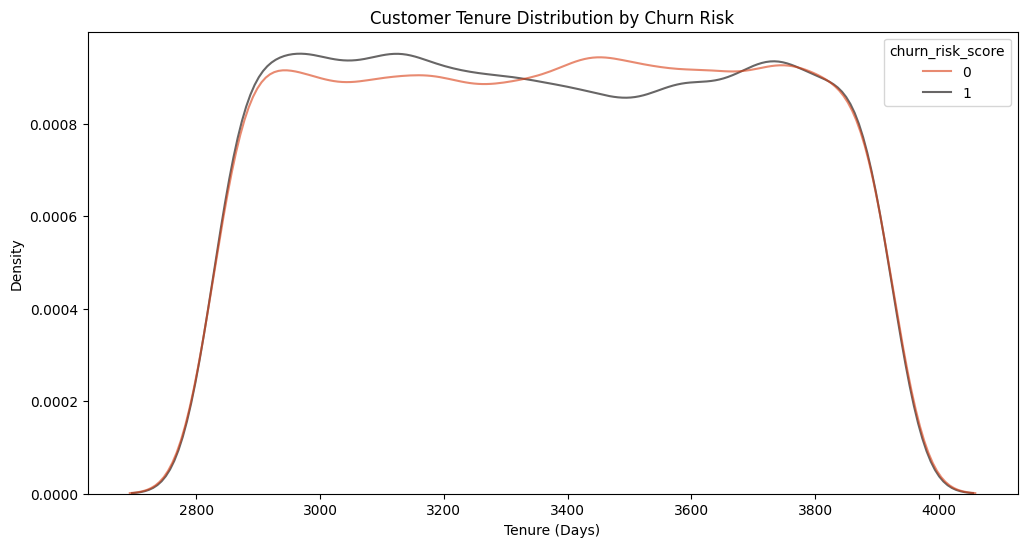

In [27]:
try:

    # Set analysis reference date (today or dataset's max date)
    reference_date = pd.Timestamp.now()

    # Calculate tenure in days
    df['tenure_days'] = (reference_date - df['joining_date']).dt.days

    # Drop rows with invalid/missing dates
    df = df.dropna(subset=['tenure_days'])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        data=df,
        x='tenure_days',
        hue='churn_risk_score',
        palette=custom_palette,
        fill=False,
        common_norm=False,
        alpha=0.6
    )
    plt.title('Customer Tenure Distribution by Churn Risk')
    plt.xlabel('Tenure (Days)')
    plt.ylabel('Density')
    plt.show()

except Exception as e:
    print(f"Error: {e}")
    print("Debug Info:")
    print("- Unique joining_date types:", df['joining_date'].apply(type).unique())
    print("- Sample dates:", df['joining_date'].head())

The KDE plot shows that high churn-risk customers are concentrated between 2,800 and 3,000 days of tenure, while low-risk customers have a wider spread. This suggests that although long-tenured customers are generally loyal, a subset with very long tenure still faces elevated churn risk. The overlap around 3,000–3,200 days highlights that tenure alone is not a strong predictor of churn, emphasizing the need to combine it with behavioral factors (such as complaints) for more accurate churn prediction.


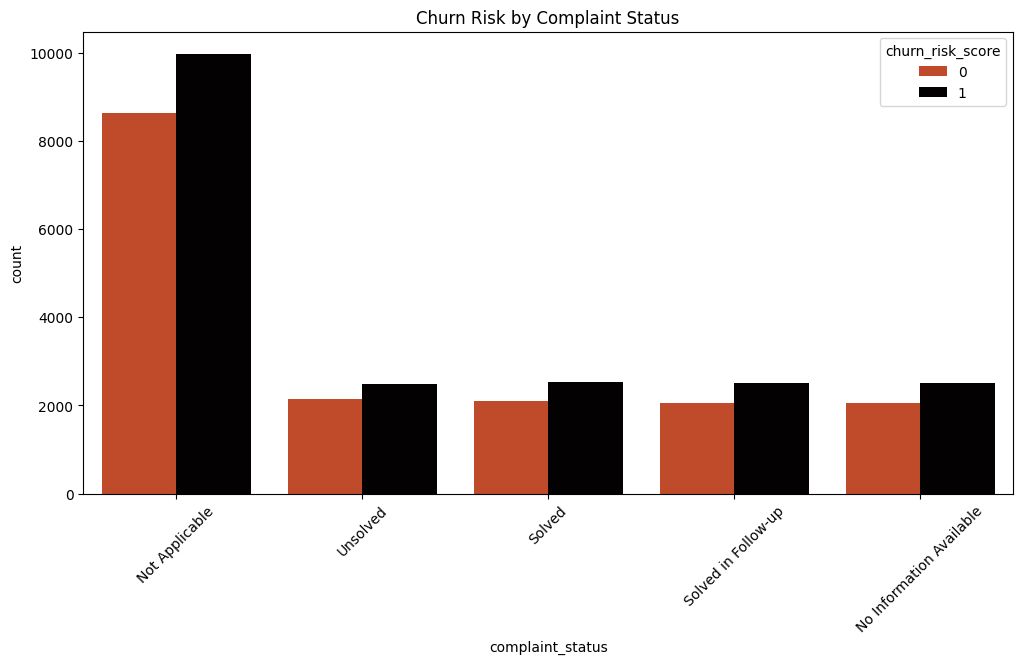

In [28]:
#Checking the complaint status impact using a countplot.
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, x='complaint_status', hue='churn_risk_score',
    palette=custom_palette, order=df['complaint_status'].value_counts().index
)
plt.title('Churn Risk by Complaint Status')
plt.xticks(rotation=45)
plt.show()

Most customers fall into the "Not Applicable" complaint status, indicating they likely did not raise any complaints. Within this group, however, more customers are at churn risk than not. Interestingly, in all other complaint categories—whether "Unsolved," "Solved," "Solved in Follow-up," or "No Information Available"—the number of churn-risk customers consistently exceeds those not at risk. This suggests that simply having a recorded complaint, regardless of its resolution status, is strongly associated with higher churn risk. Even when complaints are marked as solved, the elevated churn levels point to possible gaps in customer satisfaction or follow-up effectiveness.


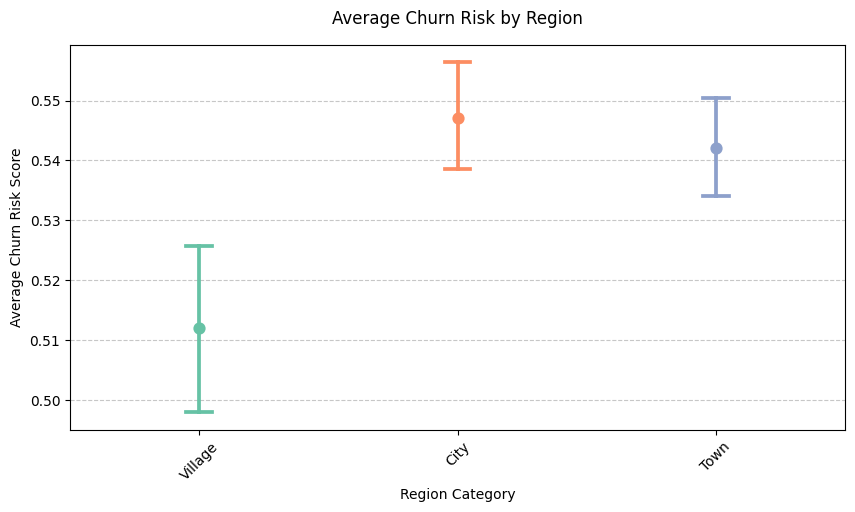

In [29]:
#We will now check the relationship between churn risk score and region.
# point plot creation of region_category vs churn_risk_score
plt.figure(figsize=(10, 5))
sns.pointplot(
    data=df,
    x='region_category',
    y='churn_risk_score',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)
plt.title('Average Churn Risk by Region', pad=15)
plt.xlabel('Region Category')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Customers in City regions show the highest average churn risk, followed by those in Towns, while Villages report the lowest. The relatively narrow confidence intervals indicate these differences are statistically significant, particularly between Village and City. This trend suggests that urban customers may be more prone to switching or disengaging, likely due to greater availability of alternatives or higher service expectations. These findings can inform location-based retention strategies tailored to customer needs.


## DATA CLEANING

We begin with the **`preferred_offer_types`** column. The percentage of null values in this column is **0.77%**, which is negligible.  
To maintain data quality and consistency, we will drop all rows containing null values in this column.


In [30]:
df.drop(columns=['security_no', 'last_visit_time', 'referral_id', 'age_group'], inplace=True)
print(df.columns)

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_year', 'joining_month',
       'tenure_days'],
      dtype='object')
